## 2.1
Measure the performance of a Name Server when processing multiple queries. Did
you notice any variability? Any expected/unexpected behavior? Does the
performance depend on the transport protocol (i.e., UDP, TCP) or on usage of
encrypted transmissions (i.e., DoT, DoH)? Does the performance vary when
DNSSEC is enabled?

<Axes: title={'center': 'Average DNS resolution time for each protocol'}, xlabel='Protocol used', ylabel='DNS resolution time (ms)'>

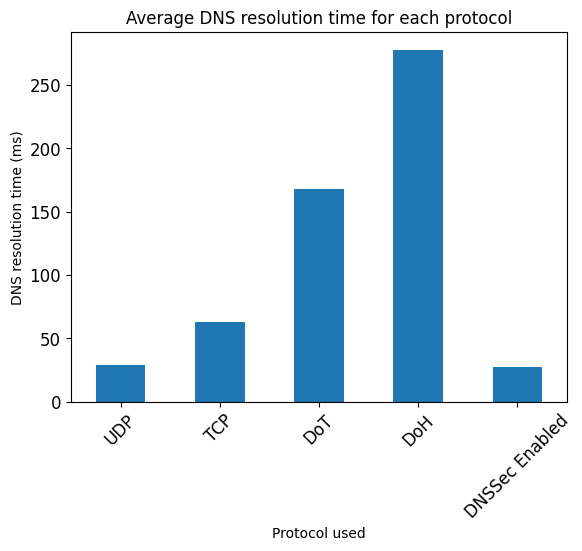

In [1]:
import pandas as pd
dnseval21 = pd.read_json('reordered-data/dnseval/dnseval.2.1.json')
dnseval21 = dnseval21[['Type', 'r_avg']]
dnseval21.plot(x='Type', y='r_avg', kind='bar', title='Average DNS resolution time for each protocol',
          legend=False, rot=45, xlabel='Protocol used', ylabel='DNS resolution time (ms)',fontsize=12)


## 2.2
Measure the performance of different Name Servers when processing the same
set of queries. Does the performance vary with the Name Server? Does it depend
on the type of query or on the geographic location of the Name Server?

/tmp/ipykernel_19538/2461371489.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dnseval22t=dnseval22.groupby(['Query type']).mean()
/tmp/ipykernel_19538/2461371489.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dnseval22l=dnseval22.groupby(['Location']).mean()


<Axes: title={'center': 'Average DNS resolution time for each location'}, xlabel='Location', ylabel='DNS resolution time (ms)'>

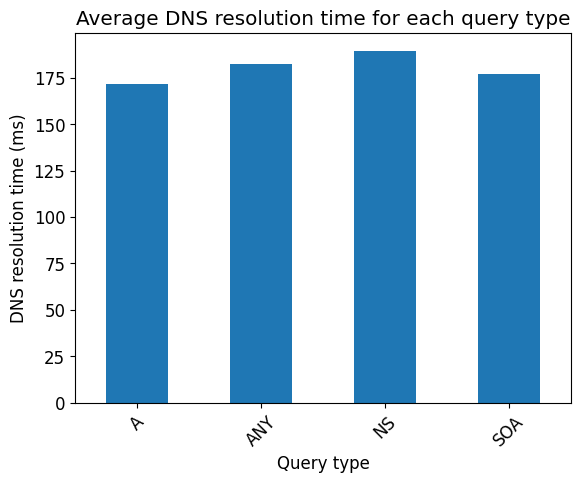

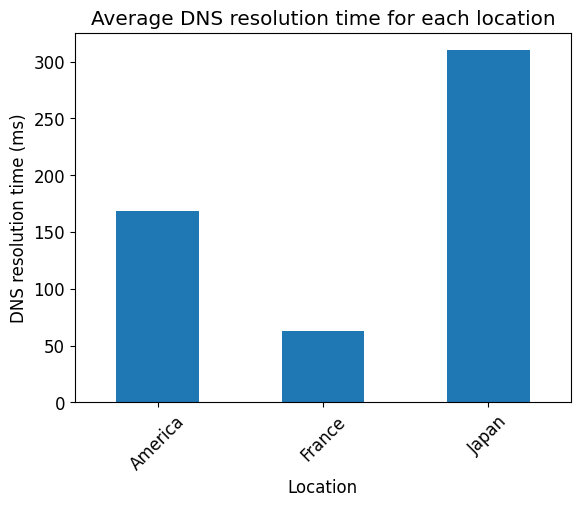

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

dnseval22 = pd.read_json('reordered-data/dnseval/dnseval.2.2.json')
nameServers=pd.read_csv('reordered-data/nameServers/NameServers_Distance.csv',sep=';')
dnseval22=pd.merge(dnseval22, nameServers)
dnseval22=dnseval22[['Query type','Location','r_avg']]
dnseval22t=dnseval22.groupby(['Query type']).mean()
dnseval22t.plot(kind='bar', title='Average DNS resolution time for each query type',legend=False, rot=45, xlabel='Query type', ylabel='DNS resolution time (ms)',fontsize=12)
dnseval22l=dnseval22.groupby(['Location']).mean()
dnseval22l.plot(kind='bar', title='Average DNS resolution time for each location',legend=False, rot=45, xlabel='Location', ylabel='DNS resolution time (ms)',fontsize=12)

## 2.3
Check the path followed by your queries using different Name Servers; does the
performance depend on the number of hops? Did you notice any
expected/unexpected behavior?

<Axes: title={'center': 'Average DNS resolution time for each name server'}, xlabel='Name server', ylabel='DNS resolution time (ms)'>

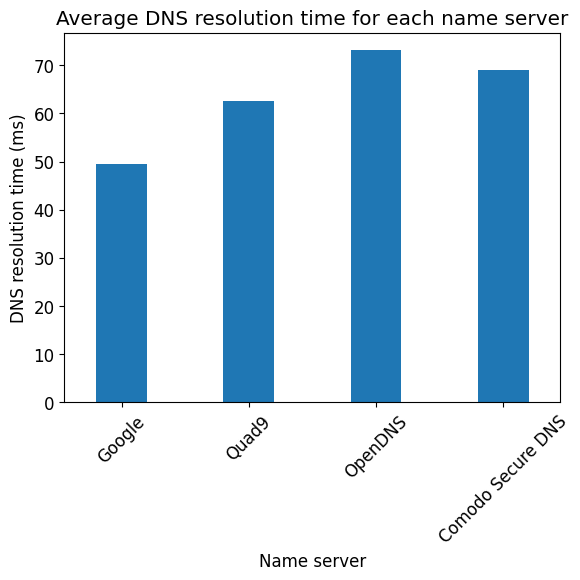

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

dnseval23 = pd.read_json('reordered-data/dnseval/dnseval.2.3.json')
nameServers=pd.read_csv('reordered-data/nameServers/NameServers.csv',sep=';')
dnseval23 = pd.merge(dnseval23, nameServers)
dnseval23 = dnseval23[['Name server','r_avg']]
dnseval23.plot(x='Name server', y='r_avg', kind='bar',legend=False, title='Average DNS resolution time for each name server',rot=45,width=0.4,xlabel='Name server', ylabel='DNS resolution time (ms)',fontsize=12)


<Axes: title={'center': 'Average latency for each hops'}, xlabel='Hops', ylabel='Latency (ms)'>

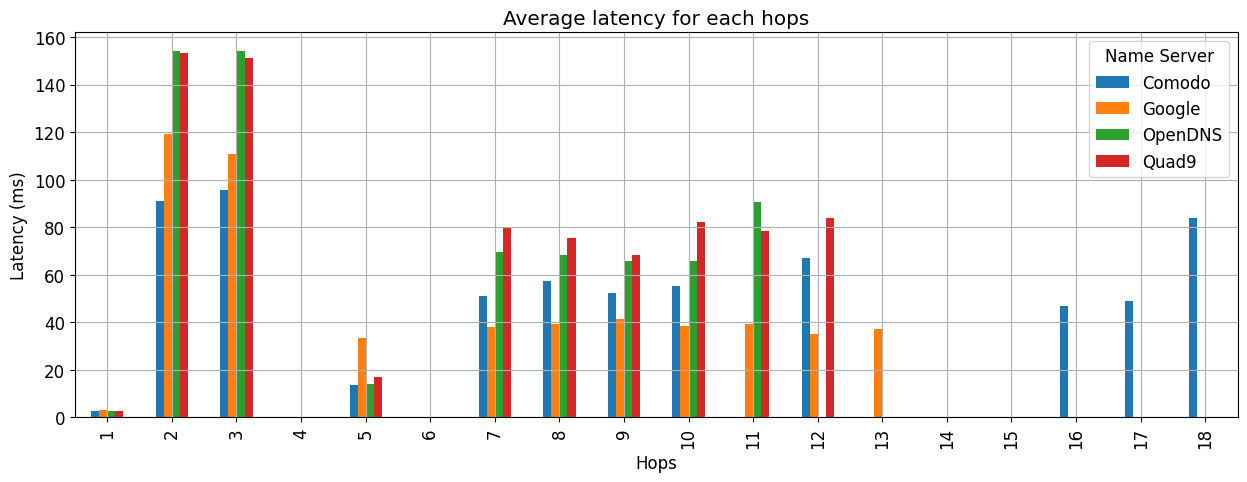

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

dnstraceroute=pd.read_csv('reordered-data/dnstraceroute.csv',sep=';')
dnstraceroute=dnstraceroute.groupby(['Name Server','Hop']).mean()
dnstraceroute = dnstraceroute.reset_index()
dnstraceroute = dnstraceroute.pivot(index='Hop', columns='Name Server', values='Time (ms)')
dnstraceroute.plot(kind='bar', title='Average latency for each hops',
              legend=True, grid=True, figsize=(15, 5), ylabel='Latency (ms)',fontsize=12,xlabel='Hops')
